In [2]:
import pickle as pkl


obj = pkl.load(open("/home/bachelor/ml-carbucks/optuna/ensemble/20251123_155224_ensemble_initial/prestep_20251123_155224_ensemble_initial.pkl", "rb"))
(
    adapters_predictions,
    ground_truths,
    distributions,
    adapters_crossval_metrics,
    adapters_dataset_metrics,
) = obj


In [3]:
[[m["map_50"] for m in metrics] for metrics in adapters_crossval_metrics]

[[0.09076210111379623,
  0.12540914118289948,
  0.107692651450634,
  0.12005994468927383,
  0.09970151633024216],
 [0.06449078768491745,
  0.06115401163697243,
  0.07063404470682144,
  0.07114843279123306,
  0.07402212917804718],
 [0.05057334527373314,
  0.06354251503944397,
  0.06887202709913254,
  0.06514590978622437,
  0.04759928211569786],
 [0.08362242579460144,
  0.08318199962377548,
  0.08914996683597565,
  0.08969693630933762,
  0.08406198769807816]]

In [4]:
from matplotlib import pyplot as plt

all_scores = [
    [] for _ in range(len(adapters_predictions))
]

for i, preds in enumerate(adapters_predictions):
    all_scores[i] = []
    for p in preds:
        for scores in p['scores']:
            all_scores[i].append(scores.item())
    


In [10]:
#subplot histograms of all adapters scores in 2x2 grid
import numpy as np


def plot_histograms(all_scores, xlim=None, info_title=''):
    # make seeded color from title
    np.random.seed(abs(hash(info_title)) % (2**32))
    colors = np.random.rand(len(all_scores), 3)
 

    fig, axs = plt.subplots(2, 2, figsize=(10, 5))
    axs = axs.flatten()
    for i, scores in enumerate(all_scores):
        axs[i].hist(scores, bins=50, color=colors[0])
        if xlim is not None:
            axs[i].set_xlim(xlim)
        axs[i].set_title(f'Adapter {i} prediction scores distribution {info_title}')
    plt.tight_layout()
    plt.show()

In [18]:
from torch import erf
import torch


minmax_normalized_scores = []
for scores in all_scores:
    min_score = min(scores)
    max_score = max(scores)
    norm_scores = [(s - min_score) / (max_score - min_score) for s in scores]
    minmax_normalized_scores.append(norm_scores)

zscore_normalized_scores = []
for scores in all_scores:
    mean_score = sum(scores) / len(scores)
    std_score = (sum((s - mean_score) ** 2 for s in scores) / len(scores)) ** 0.5
    norm_scores = [(s - mean_score) / std_score for s in scores]
    zscore_normalized_scores.append(norm_scores)

zscore_probability_normalized_scores = []
for scores in all_scores:
    mean_score = sum(scores) / len(scores)
    std_score = (sum((s - mean_score) ** 2 for s in scores) / len(scores)) ** 0.5
    zscore_scores = [(s - mean_score) / std_score for s in scores]
    prob_scores = [0.5 * (1 + erf(torch.tensor(s) / (2 ** 0.5))) for s in zscore_scores]
    zscore_probability_normalized_scores.append(prob_scores)

persentile_normalized_scores = []
for scores in all_scores:
    sorted_scores = sorted(scores)
    norm_scores = [sorted_scores.index(s) / len(scores) for s in scores]
    persentile_normalized_scores.append(norm_scores)

quantile_clipped_minmax_normalized_scores = []
for scores in all_scores:
    sorted_scores = sorted(scores)
    lower_bound = sorted_scores[int(0.05 * len(scores))]
    upper_bound = sorted_scores[int(0.95 * len(scores))]
    clipped_scores = [max(min(s, upper_bound), lower_bound) for s in scores]
    min_score = min(clipped_scores)
    max_score = max(clipped_scores)
    norm_scores = [(s - min_score) / (max_score - min_score) for s in clipped_scores]
    quantile_clipped_minmax_normalized_scores.append(norm_scores)


quantile_clipped_zscore_probability_normalized_scores = []
for scores in all_scores:
    sorted_scores = sorted(scores)
    lower_bound = sorted_scores[int(0.05 * len(scores))]
    upper_bound = sorted_scores[int(0.95 * len(scores))]
    clipped_scores = [max(min(s, upper_bound), lower_bound) for s in scores]
    mean_score = sum(clipped_scores) / len(clipped_scores)
    std_score = (sum((s - mean_score) ** 2 for s in clipped_scores) / len(clipped_scores)) ** 0.5
    zscore_scores = [(s - mean_score) / std_score for s in clipped_scores]
    prob_scores = [0.5 * (1 + erf(torch.tensor(s) / (2 ** 0.5))) for s in zscore_scores]
    quantile_clipped_zscore_probability_normalized_scores.append(prob_scores)

zscore_sigmoid_normalized_scores = []
for scores in all_scores:
    mean_score = sum(scores) / len(scores)
    std_score = (sum((s - mean_score) ** 2 for s in scores) / len(scores)) ** 0.5
    zscore_scores = [(s - mean_score) / std_score for s in scores]
    sigmoid_scores = [1 / (1 + torch.exp(-torch.tensor(s))) for s in zscore_scores]
    zscore_sigmoid_normalized_scores.append(sigmoid_scores)

zscore_probability_sigmoid_normalized_scores = []
for scores in all_scores:
    mean_score = sum(scores) / len(scores)
    std_score = (sum((s - mean_score) ** 2 for s in scores) / len(scores)) ** 0.5
    zscore_scores = [(s - mean_score) / std_score for s in scores]
    prob_scores = [0.5 * (1 + erf(torch.tensor(s) / (2 ** 0.5))) for s in zscore_scores]
    sigmoid_scores = [1 / (1 + torch.exp(-s)) for s in prob_scores]
    zscore_probability_sigmoid_normalized_scores.append(sigmoid_scores)

sigmoid_normalized_score = []
for scores in all_scores:
    sigmoid_scores = [1 / (1 + torch.exp(-torch.tensor(s))) for s in scores]
    sigmoid_normalized_score.append(sigmoid_scores)
    

In [12]:
for i, adapter_scores in enumerate(all_scores):
    print(f"adapter {i} produced {len(adapter_scores)} scores")

adapter 0 produced 11276 scores
adapter 1 produced 9446 scores
adapter 2 produced 20019 scores
adapter 3 produced 20075 scores


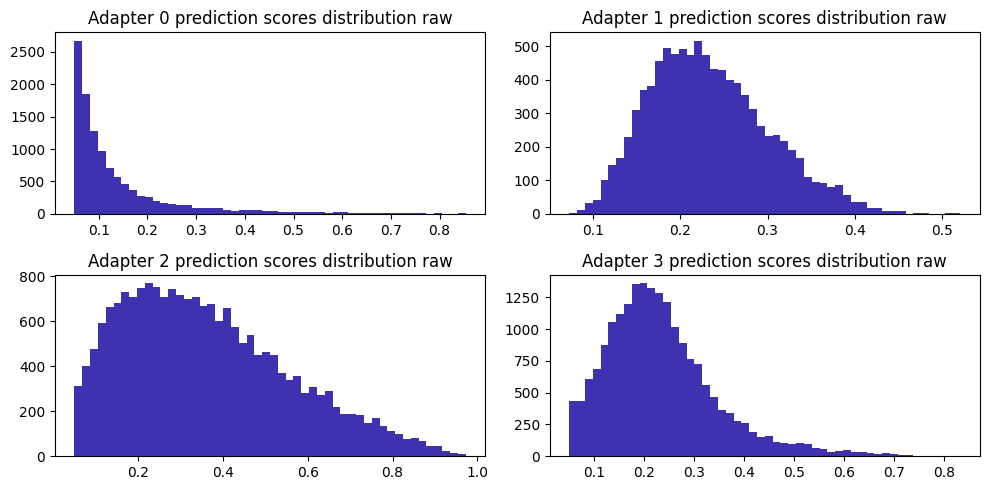

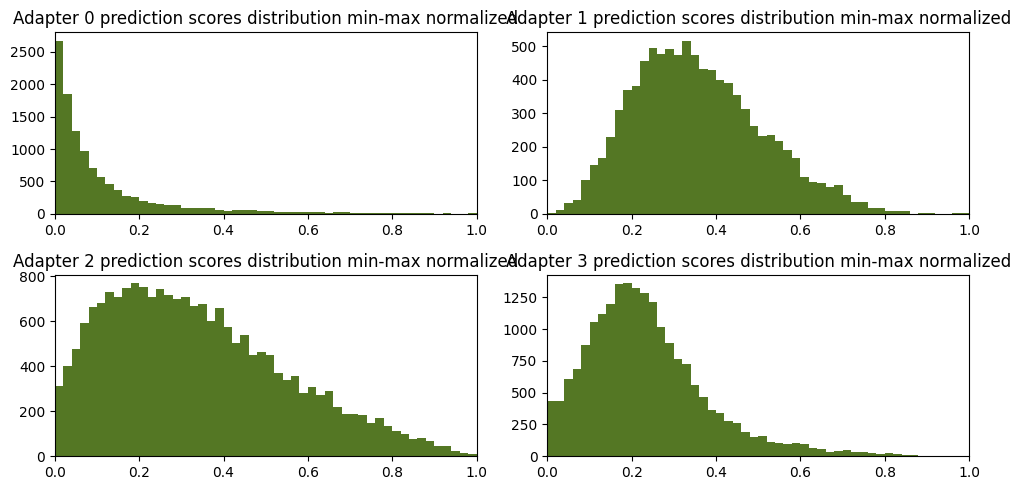

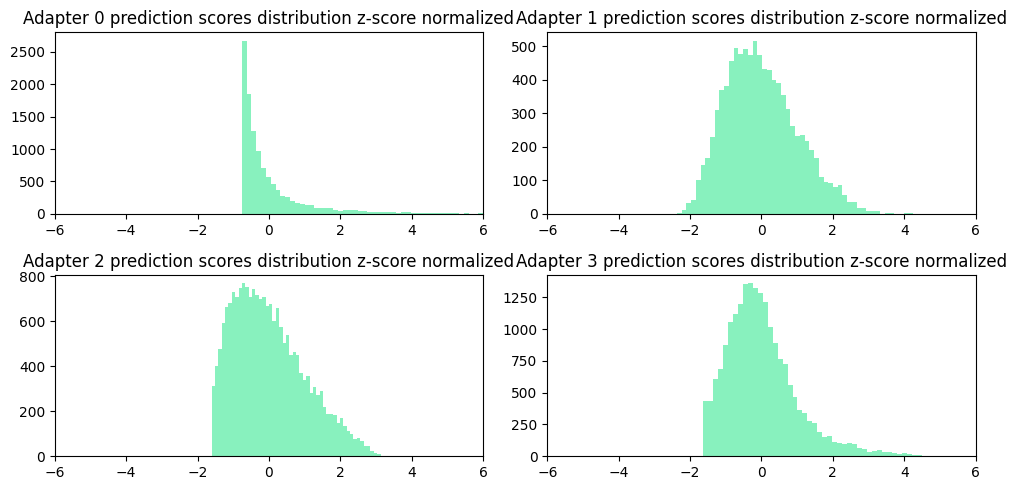

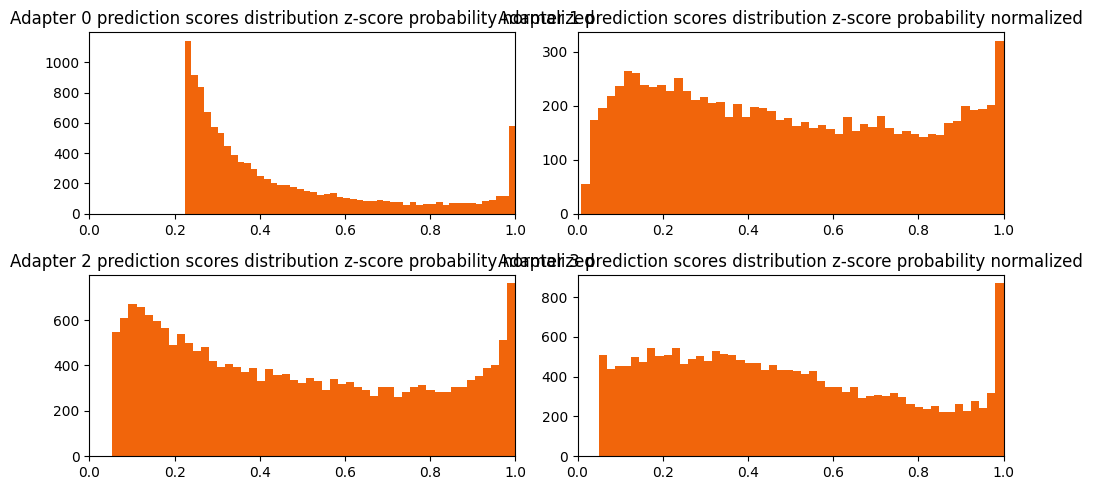

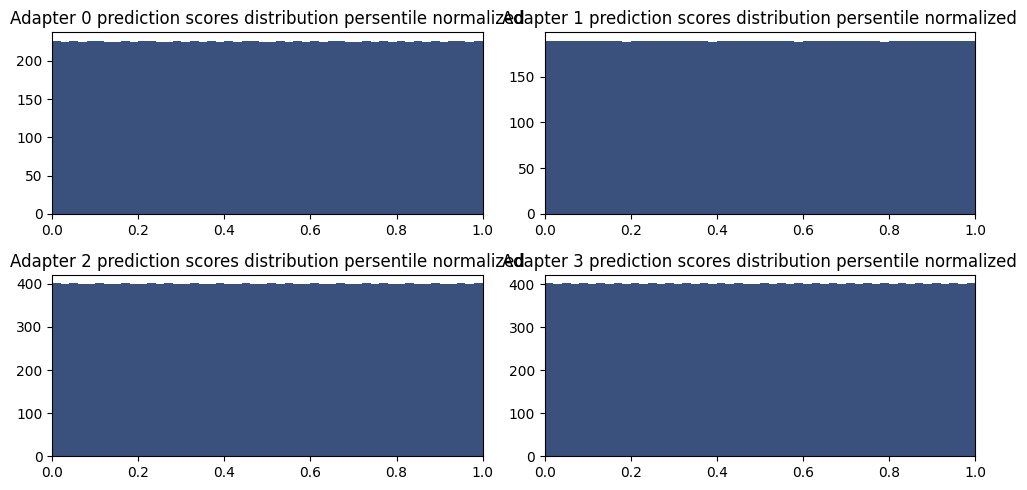

In [14]:
plot_histograms(all_scores, info_title='raw')
plot_histograms(minmax_normalized_scores, xlim=(0, 1), info_title='min-max normalized')
plot_histograms(zscore_normalized_scores, xlim=(-6, 6), info_title='z-score normalized')
plot_histograms(zscore_probability_normalized_scores, xlim=(0, 1), info_title='z-score probability normalized')
plot_histograms(persentile_normalized_scores, xlim=(0, 1), info_title='persentile normalized')

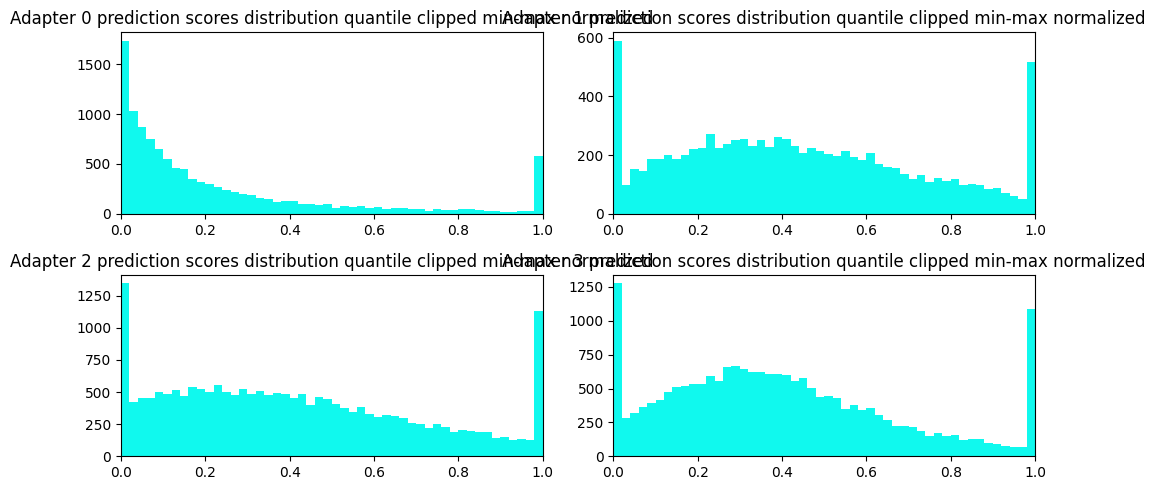

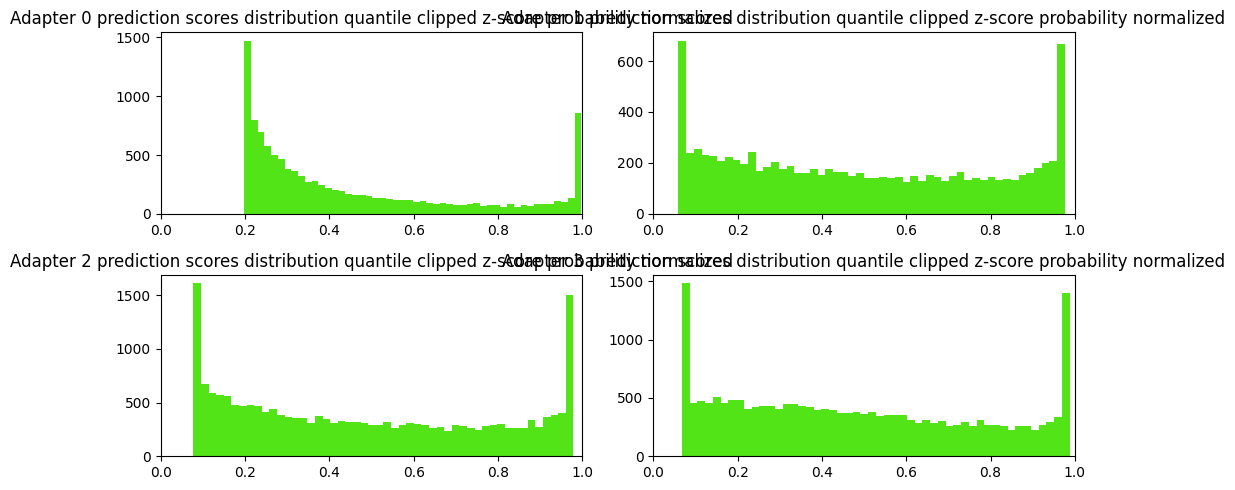

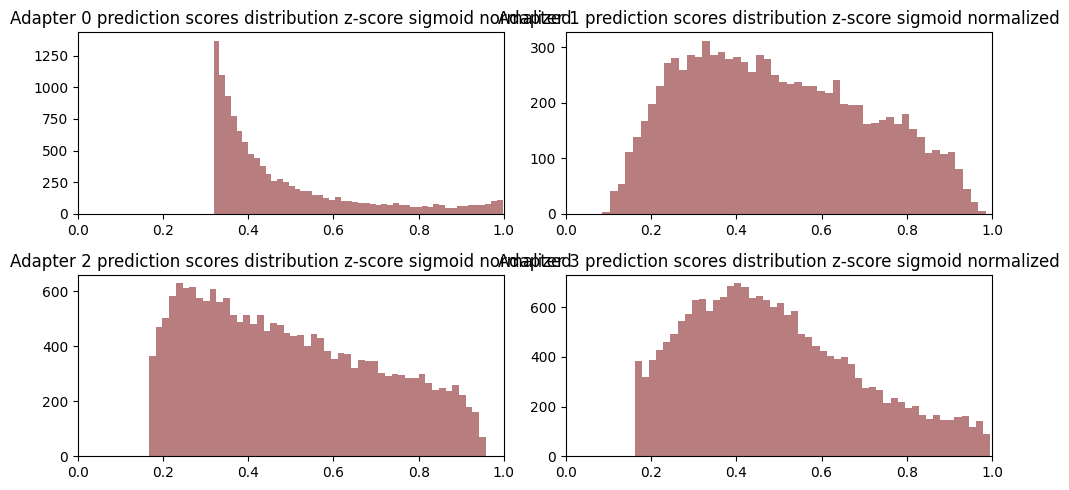

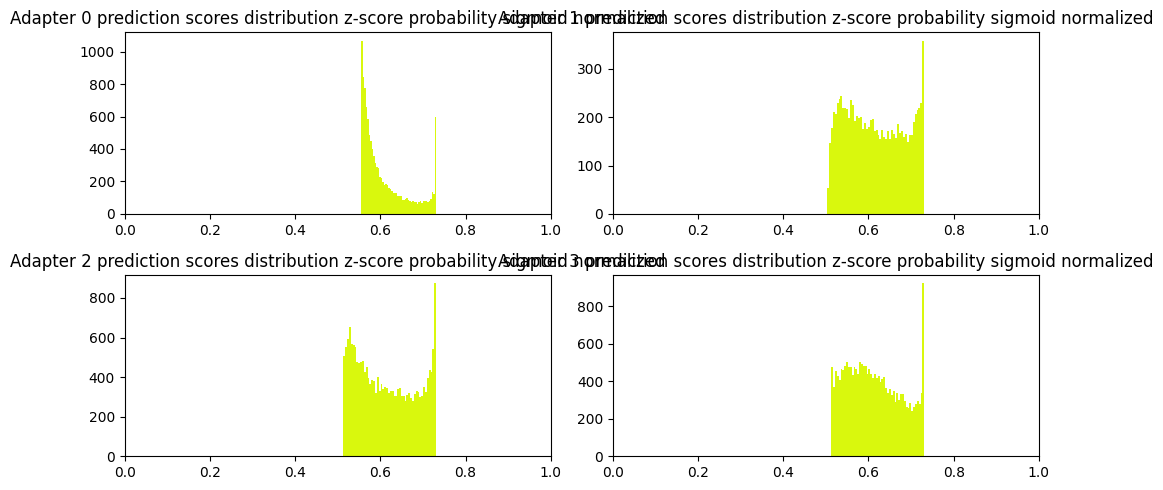

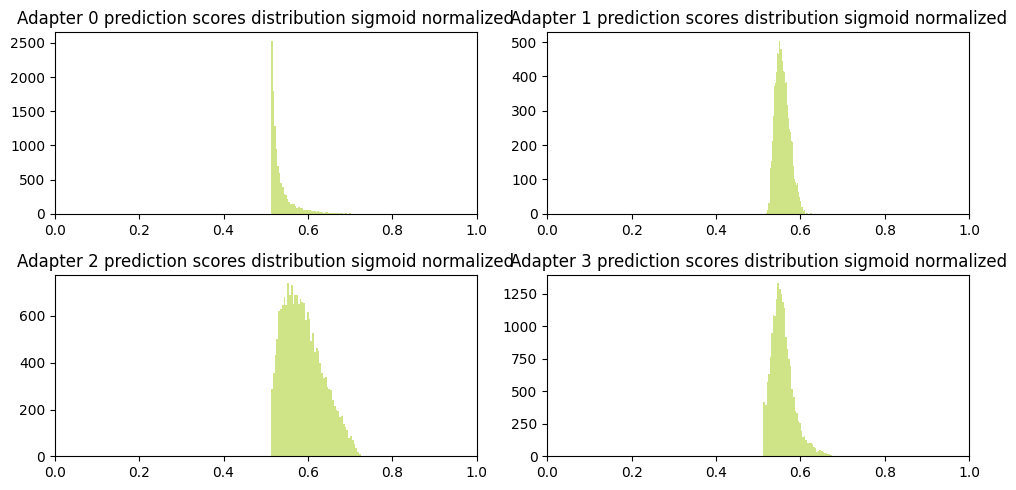

In [19]:
plot_histograms(quantile_clipped_minmax_normalized_scores, xlim=(0, 1),  info_title='quantile clipped min-max normalized')
plot_histograms(quantile_clipped_zscore_probability_normalized_scores, xlim=(0, 1), info_title='quantile clipped z-score probability normalized')
plot_histograms(zscore_sigmoid_normalized_scores, xlim=(0, 1), info_title='z-score sigmoid normalized')
plot_histograms(zscore_probability_sigmoid_normalized_scores, xlim=(0, 1), info_title='z-score probability sigmoid normalized')
plot_histograms(sigmoid_normalized_score, xlim=(0, 1), info_title='sigmoid normalized')

In [23]:
zscore_probability_on_sigmoid_normalized_scores = []
for scores in all_scores:
    sigmoid_scores = [1 / (1 + torch.exp(-torch.tensor(s))) for s in scores]
    mean_score = sum(sigmoid_scores) / len(sigmoid_scores)
    std_score = (sum((s - mean_score) ** 2 for s in sigmoid_scores) / len(sigmoid_scores)) ** 0.5
    zscore_scores = [(s - mean_score) / std_score for s in sigmoid_scores]
    prob_scores = [0.5 * (1 + erf(torch.tensor(s) / (2 ** 0.5))) for s in zscore_scores]
    zscore_probability_on_sigmoid_normalized_scores.append(prob_scores)
    
minmax_on_sigmoid_normalized_scores = []
for scores in all_scores:
    sigmoid_scores = [1 / (1 + torch.exp(-torch.tensor(s))) for s in scores]
    min_score = min(sigmoid_scores)
    max_score = max(sigmoid_scores)
    norm_scores = [(s - min_score) / (max_score - min_score) for s in sigmoid_scores]
    minmax_on_sigmoid_normalized_scores.append(norm_scores)

/tmp/ipykernel_1234942/1855111812.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prob_scores = [0.5 * (1 + erf(torch.tensor(s) / (2 ** 0.5))) for s in zscore_scores]


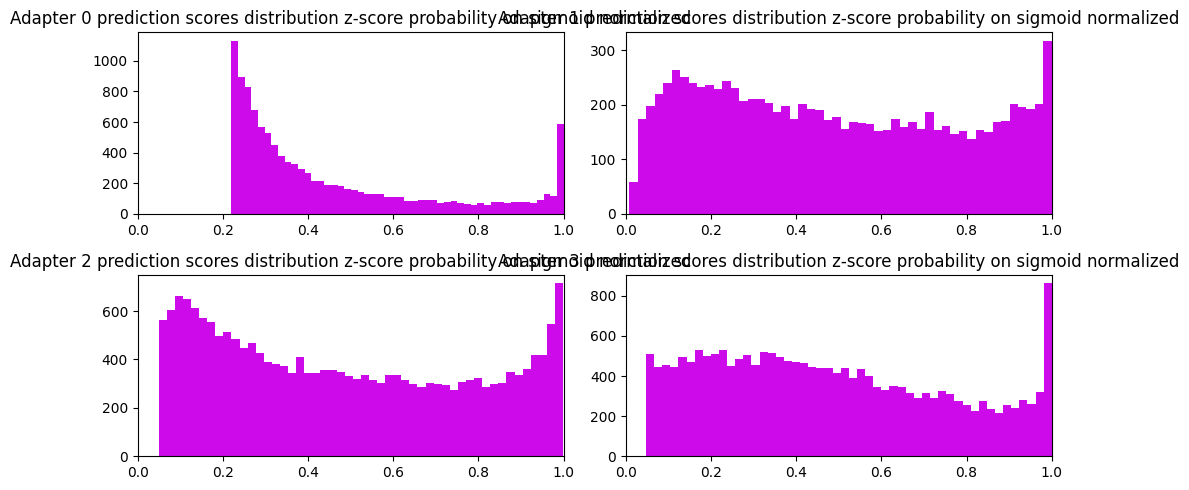

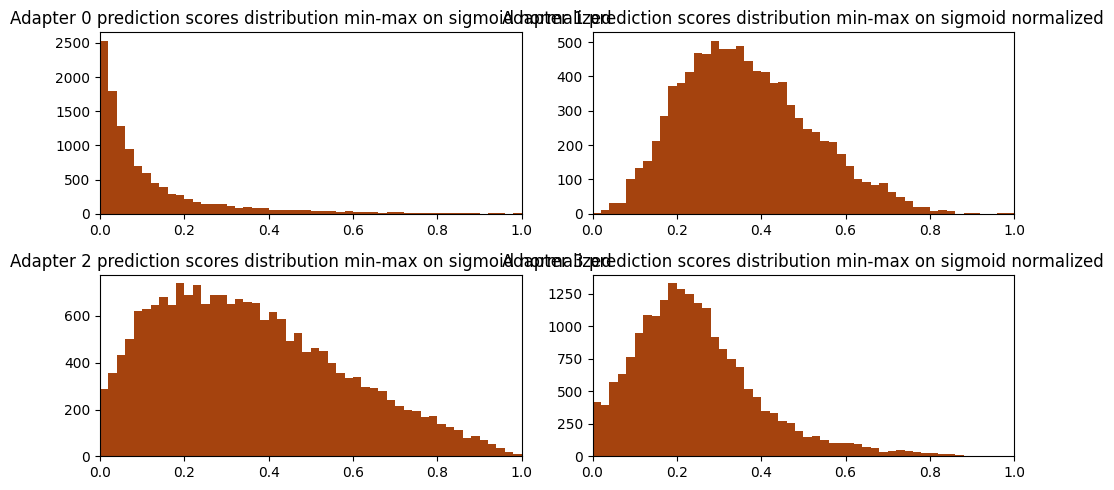

In [24]:
plot_histograms(zscore_probability_on_sigmoid_normalized_scores, xlim=(0, 1), info_title='z-score probability on sigmoid normalized')
plot_histograms(minmax_on_sigmoid_normalized_scores, xlim=(0, 1), info_title='min-max on sigmoid normalized')